In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import torch

# Load dataset
data = np.genfromtxt("data/flutter.dat")
u = data[:,0]
y = data[:,1]

# Plot input and output
if False:
    t_ = np.linspace(0, len(y)-1, len(y))
    plt.figure()
    plt.plot(t_, y)
    plt.xlabel("Sample")
    plt.ylabel("Output")

    plt.figure()
    plt.plot(t_, u)
    plt.xlabel("Sample")
    plt.ylabel("Input")
    plt.show()

In [28]:
# Construct X and Y matrices for regression
TRAIN_TEST_SPLIT = 0.9
NUM_DELAYS = 10

# Split raw data into train and test sets
train_test_index = int(len(y)*TRAIN_TEST_SPLIT)
y_train = y[:train_test_index]
y_test  = y[train_test_index:]
u_train = u[:train_test_index]
u_test  = u[train_test_index:]

# Construct training data matrices
Y_train = np.expand_dims(y_train[NUM_DELAYS:], axis=1)
X_train = np.zeros(shape=(len(y_train)-NUM_DELAYS, 2*NUM_DELAYS))
for i in range(len(y_train)-NUM_DELAYS):
    X_train[i,:NUM_DELAYS] = y_train[i:i+NUM_DELAYS]
    X_train[i,NUM_DELAYS:] = u_train[i:i+NUM_DELAYS]

Epoch 1, training loss: 0.6880
Epoch 100, training loss: 0.0288
Epoch 200, training loss: 0.0137
Epoch 300, training loss: 0.0065
Epoch 400, training loss: 0.0039
Epoch 500, training loss: 0.0031
Epoch 600, training loss: 0.0027
Epoch 700, training loss: 0.0024
Epoch 800, training loss: 0.0022
Epoch 900, training loss: 0.0020
Epoch 1000, training loss: 0.0019
Epoch 1100, training loss: 0.0018
Epoch 1200, training loss: 0.0017
Epoch 1300, training loss: 0.0016
Epoch 1400, training loss: 0.0015
Epoch 1500, training loss: 0.0014
Epoch 1600, training loss: 0.0013
Epoch 1700, training loss: 0.0013
Epoch 1800, training loss: 0.0012
Epoch 1900, training loss: 0.0011
Epoch 2000, training loss: 0.0011
Epoch 2100, training loss: 0.0010
Epoch 2200, training loss: 0.0010
Epoch 2300, training loss: 0.0010
Epoch 2400, training loss: 0.0009
Epoch 2500, training loss: 0.0009
Epoch 2600, training loss: 0.0009
Epoch 2700, training loss: 0.0008
Epoch 2800, training loss: 0.0008
Epoch 2900, training loss:

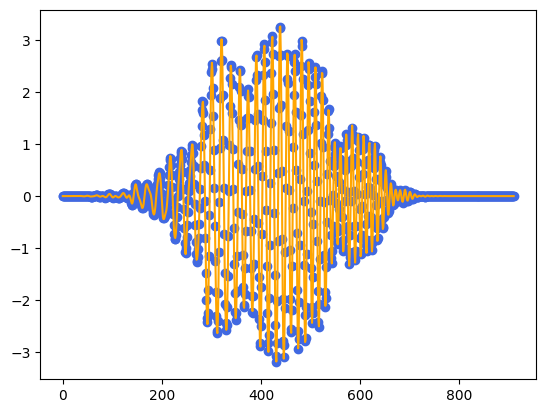

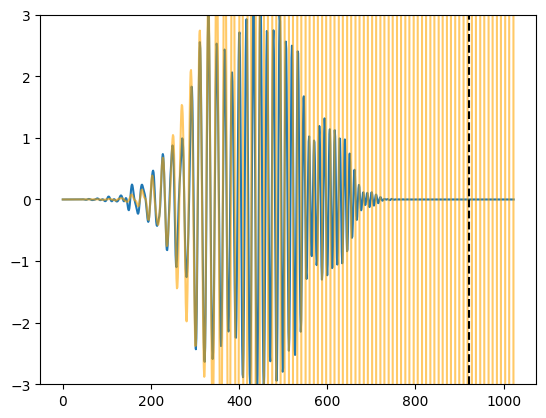

In [31]:
X_train_tensor = torch.from_numpy(X_train).to(torch.float32)
Y_train_tensor = torch.from_numpy(Y_train).to(torch.float32)

dp, features = X_train_tensor.shape
_, outputs = Y_train_tensor.shape

NUM_HIDDEN_LAYERS = 16
LEARNING_RATE = 1e-2
MOMENTUM = 0.9
NUM_EPOCHS = 10000

# Define model, loss function, and search algorithm
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=features, out_features=NUM_HIDDEN_LAYERS),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=NUM_HIDDEN_LAYERS, out_features=outputs)
)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

# Train model
model.train()
for epoch in range(1, NUM_EPOCHS+1):
    Y_pred_ = model(X_train_tensor)
    loss_value = loss(Y_pred_, Y_train_tensor)

    model.zero_grad()
    loss_value.backward()
    optimizer.step()
    if (epoch == 1) or ((epoch % 100) == 0):
        print(f"Epoch {epoch}, training loss: {loss_value.item():.4f}")

# Evaluate train set
model.eval()
with torch.no_grad():
    Y_pred_train = model(X_train_tensor).numpy()

plt.figure()
t_ = np.linspace(0, Y_train.shape[0]-1, Y_train.shape[0])
plt.scatter(t_, Y_train, c="royalblue")
plt.plot(t_, Y_pred_train, c="orange")
plt.show()

# Testing loop
Y_pred = np.zeros(shape=(0,1))
for i in range(len(y)):
    if i < NUM_DELAYS:
        Y_pred = np.vstack((Y_pred, y[i]))
    else:
        X_ = np.hstack(([Y_pred[-NUM_DELAYS:,0]], [u[i-NUM_DELAYS:i]]))
        X_tensor_ = torch.from_numpy(X_).to(torch.float32)
        with torch.no_grad():
            Y_pred_ = model(X_tensor_).numpy()
        Y_pred = np.vstack((Y_pred, Y_pred_))
Y_pred = Y_pred.flatten()

plt.figure()
plt.plot(y)
plt.plot(Y_pred, c="orange", alpha=0.6)
plt.axvline(x=train_test_index, c="black", ls="--")
plt.ylim([-3,3])
plt.show()

In [8]:
Y_train_tensor.shape

torch.Size([399, 1])

In [6]:
temp

399